In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


# Data Wrangling
- In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis

In [ ]:
# Importing data and some of raw data :

In [2]:
df =pd.read_csv('traffic_violaions.CSV',header=0)
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
df.tail()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,6:43,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52965,10/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## Size of raw data:
df.shape

(52966, 15)

In [5]:
## Infromation about data:
## Explore if we have missing value?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [6]:
## Count the missing values at each column:
df.isnull().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

In [7]:
## Function to visualize data:
def vis(col):
    df[col].value_counts().plot(kind='pie')

## Try to know the difference between violation and violation_raw?

In [8]:
df['violation_raw'].value_counts()

Speeding                            32139
Other Traffic Violation              8385
Equipment/Inspection Violation       4276
Special Detail/Directed Patrol       1954
Registration Violation               1820
Call for Service                      673
Violation of City/Town Ordinance      131
Motorist Assist/Courtesy              119
APB                                    43
Suspicious Person                      31
Warrant                                10
Name: violation_raw, dtype: int64

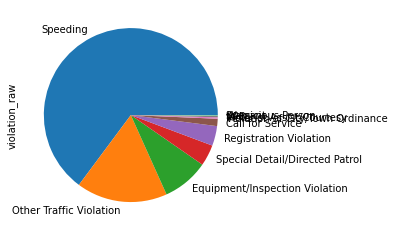

In [9]:
vis('violation_raw')

In [10]:
df['violation'].value_counts()

Speeding               32139
Moving violation        8385
Equipment               4276
Other                   2961
Registration/plates     1820
Name: violation, dtype: int64

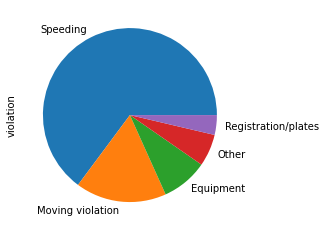

In [11]:
vis('violation')

## Details of search_type:

In [12]:
df['search_type'].value_counts()

Incident to Arrest                                          941
Probable Cause                                              447
Inventory                                                   129
Protective Frisk                                            120
Reasonable Suspicion                                        116
Incident to Arrest,Inventory                                 90
Incident to Arrest,Probable Cause                            68
Incident to Arrest,Protective Frisk                          31
Probable Cause,Reasonable Suspicion                          29
Probable Cause,Protective Frisk                              22
Incident to Arrest,Inventory,Probable Cause                  21
Inventory,Probable Cause                                     13
Incident to Arrest,Inventory,Protective Frisk                11
Inventory,Protective Frisk                                   10
Incident to Arrest,Probable Cause,Protective Frisk           10
Protective Frisk,Reasonable Suspicion   

In [13]:
df['search_type'].value_counts().sum()

2085

## Details of stop_duration: 

In [14]:
df['stop_duration'].value_counts()

0-15 Min     37433
16-30 Min     9845
30+ Min       2303
Name: stop_duration, dtype: int64

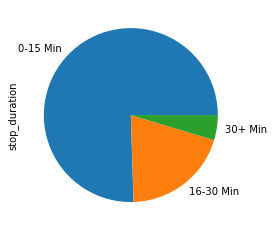

In [15]:
vis('stop_duration')

## Details of race:

In [16]:
df['driver_race'].value_counts()

White       37364
Black        6594
Hispanic     4099
Asian        1375
Other         149
Name: driver_race, dtype: int64

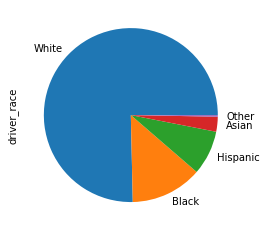

In [17]:
vis('driver_race')

## Details of stop_outcome:

In [18]:
df['stop_outcome'].value_counts()

Citation            45931
Arrest Driver        1669
Warning              1148
N/D                   348
No Action             285
Arrest Passenger      200
Name: stop_outcome, dtype: int64

## Explore if we have duplicated values ?

In [19]:
 df[df.duplicated()]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
16,7/19/2005,0:30,NaN,M,1982.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
104,10/3/2005,13:26,NaN,M,1975.0,30.0,Black,Speeding,Speeding,False,NaN,Arrest Driver,True,30+ Min,False
117,10/4/2005,0:36,NaN,M,1961.0,44.0,White,Special Detail/Directed Patrol,Other,False,NaN,Arrest Driver,True,30+ Min,False
149,10/5/2005,10:00,NaN,M,1981.0,24.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
239,10/8/2005,12:30,NaN,M,1978.0,27.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52480,9/15/2011,0:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52584,9/19/2011,1:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52696,9/23/2011,1:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52772,9/26/2011,13:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [20]:
temp = df
temp

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,6:43,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# From data wrangling:
 - (country_name) column is empty, so i will drop it.
 - (driver_age_raw) column is not accurate, it contains values makes me confused, and (driver_age) column is enough to made my analysis, so i will drop it.
 - (violation_raw) is more specific than (violation).
 - (search_type) column does not have enough data, so i will drop it.
 - The last row of this data is empty, so i wil drop it.
 - We have 286 duplicated rows, so i will drop them.
 - we have some missing values (NaN values), i will clean them.
 

# Data cleaning:
- In this section, i will do what i found in the privious section.
- drop empty and useless columns.
- modify violation column.
- remove duplicated and NaN values

In [21]:
## remove (country_name),(driver_age_raw),(search_type)
df.drop(['country_name','driver_age_raw','search_type'], axis=1, inplace=True)

In [22]:
df

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
52962,10/5/2011,6:43,M,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
52964,10/5/2011,7:19,F,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [23]:
## modify violation_raw
df['violation_raw'].replace(['Call for Service','Violation of City/Town Ordinance','Motorist Assist/Courtesy','APB','Suspicious Person','Warrant','Other Traffic Violation'],'other',inplace=True)

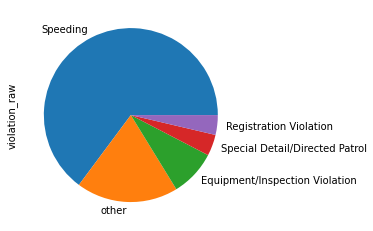

In [24]:
vis('violation_raw')

In [25]:
## remove violation column, because vilation raw after modification is enough
df.drop('violation', axis=1, inplace=True)

In [26]:
## remove duplicated values:
df.drop_duplicates(inplace=True)

In [27]:
## remove NaN values:
df.dropna(inplace=True)

# Exploratory Data Analysis:

In [28]:
df

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,M,32.0,White,Speeding,False,Arrest Driver,True,0-15 Min,False
52958,10/4/2011,22:36,F,44.0,Hispanic,Speeding,False,Citation,False,0-15 Min,False
52959,10/4/2011,23:25,F,20.0,Black,Speeding,False,Citation,False,0-15 Min,False
52962,10/5/2011,6:43,M,25.0,White,Speeding,False,Citation,False,0-15 Min,False


## Tabular summaries of the data in the form of crosstabs:

In [67]:
pd.crosstab(df['violation_raw'], df['drugs_related_stop'])

drugs_related_stop,False,True
violation_raw,,
Equipment/Inspection Violation,4166,90
Registration Violation,1770,30
Special Detail/Directed Patrol,1865,3
Speeding,31819,145
other,9156,127


In [68]:
pd.crosstab(df['violation_raw'], df['driver_gender'])

driver_gender,F,M
violation_raw,,
Equipment/Inspection Violation,851,3405
Registration Violation,498,1302
Special Detail/Directed Patrol,53,1815
Speeding,9865,22099
other,1678,7605


In [69]:
pd.crosstab(df['violation_raw'], df['driver_race'])

driver_race,Asian,Black,Hispanic,Other,White
violation_raw,,,,,
Equipment/Inspection Violation,92,855,649,7,2653
Registration Violation,25,423,355,1,996
Special Detail/Directed Patrol,41,499,228,15,1085
Speeding,1030,3109,1682,88,26055
other,179,1646,1142,36,6280


In [71]:
pd.crosstab(df['violation_raw'], df['stop_outcome'])

stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
violation_raw,,,,,,
Equipment/Inspection Violation,279,81,3273,261,25,337
Registration Violation,217,23,1502,12,12,34
Special Detail/Directed Patrol,9,0,1846,0,8,5
Speeding,444,42,30971,41,20,446
other,693,54,8033,34,197,272


In [72]:
pd.crosstab(df['violation_raw'], df['is_arrested'])

is_arrested,False,True
violation_raw,,
Equipment/Inspection Violation,3896,360
Registration Violation,1560,240
Special Detail/Directed Patrol,1859,9
Speeding,31478,486
other,8536,747


In [29]:
## show more statistics about numerical data (driver_age) after the cleaning:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
driver_age,49171.0,34.181347,12.774164,15.0,23.0,31.0,43.0,88.0


In [30]:
## creat mask for drugs_related_stop:
hooked = df.drugs_related_stop == True  
Nhooked = df.drugs_related_stop == False

# Explore the relation between category of violation and drugs:


In [31]:
df.violation_raw[hooked].value_counts()

Speeding                          145
other                             127
Equipment/Inspection Violation     90
Registration Violation             30
Special Detail/Directed Patrol      3
Name: violation_raw, dtype: int64

In [32]:
df.violation_raw[Nhooked].value_counts()

Speeding                          31819
other                              9156
Equipment/Inspection Violation     4166
Special Detail/Directed Patrol     1865
Registration Violation             1770
Name: violation_raw, dtype: int64

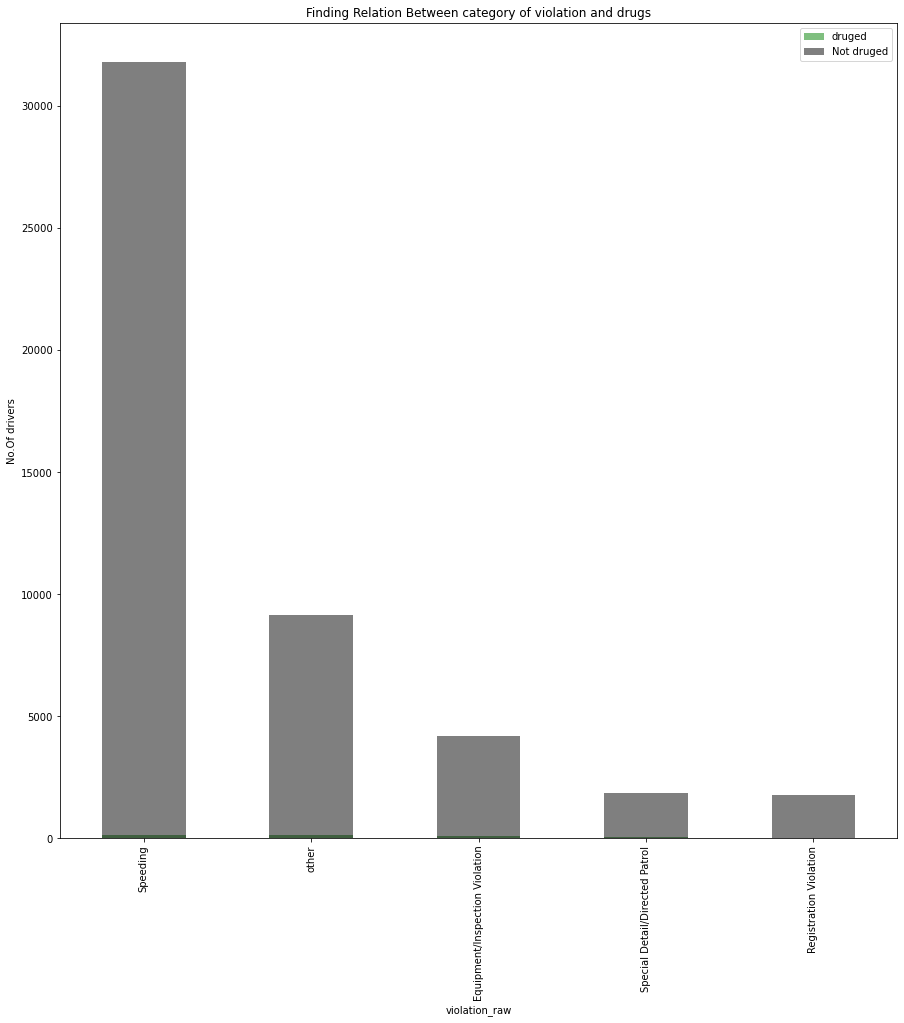

In [33]:
# Visualize the result 
plt.figure(figsize=(15,15))
df.violation_raw[hooked].value_counts().plot(kind='bar', alpha=.5, color='green', label='druged')
df.violation_raw[Nhooked].value_counts().plot(kind='bar', alpha=.5, color='black', label='Not druged')
plt.legend();
plt.title('Finding Relation Between category of violation and drugs')
plt.ylabel('No.Of drivers')
plt.xlabel('violation_raw');

- There is no relation between drugged drivers and category of violation.


# Explore the relation between driver 's age and category of violation:

In [34]:
## create mask for driver_age:
youth = df.driver_age <= 40   ## drivers who have 40 years old or less
old = df.driver_age > 40          ## drivers who have more than 40 years old

In [35]:
df.violation_raw[youth].value_counts()

Speeding                          23322
other                              5585
Equipment/Inspection Violation     3330
Registration Violation             1373
Special Detail/Directed Patrol      688
Name: violation_raw, dtype: int64

In [36]:
df.violation_raw[old].value_counts()

Speeding                          8642
other                             3698
Special Detail/Directed Patrol    1180
Equipment/Inspection Violation     926
Registration Violation             427
Name: violation_raw, dtype: int64

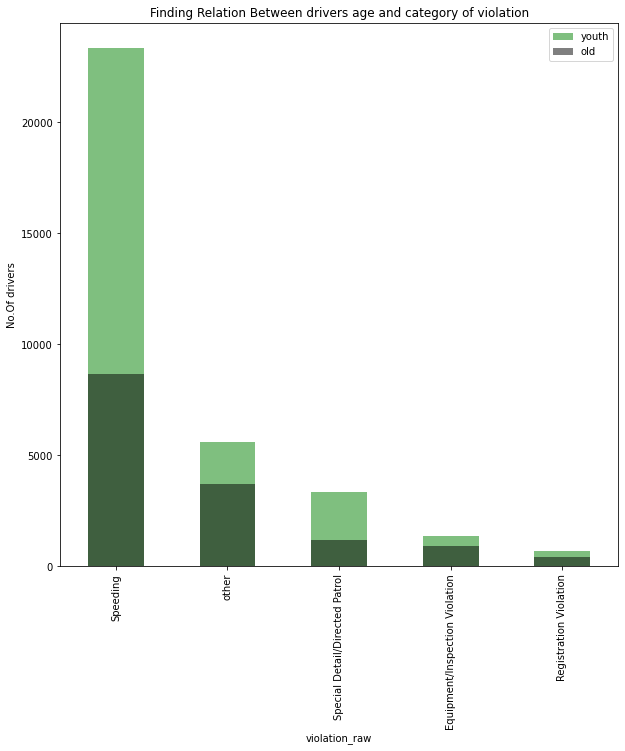

In [37]:
# Visualize the result 
plt.figure(figsize=(10,10))
df.violation_raw[youth].value_counts().plot(kind='bar', alpha=.5, color='green', label='youth')
df.violation_raw[old].value_counts().plot(kind='bar', alpha=.5, color='black', label='old')
plt.legend();
plt.title('Finding Relation Between drivers age and category of violation')
plt.ylabel('No.Of drivers')
plt.xlabel('violation_raw');

## There is a clear relation between the driver's age and the category of violation :

- drivers who have 40 years old or less make more traffic violation.
- speeding violation is the most one that spread out among drivers especially youth. 

# Explore the relation between driver_gender and the category of violation: 

In [38]:
## create mask for driver_gender:
male = df['driver_gender'] == 'M'
female = df['driver_gender'] == 'F'

In [39]:
df['driver_gender'].value_counts()

M    36226
F    12945
Name: driver_gender, dtype: int64

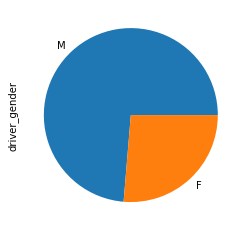

In [40]:
vis('driver_gender')

In [41]:
df.violation_raw[male].value_counts()

Speeding                          22099
other                              7605
Equipment/Inspection Violation     3405
Special Detail/Directed Patrol     1815
Registration Violation             1302
Name: violation_raw, dtype: int64

In [42]:
df.violation_raw[female].value_counts()

Speeding                          9865
other                             1678
Equipment/Inspection Violation     851
Registration Violation             498
Special Detail/Directed Patrol      53
Name: violation_raw, dtype: int64

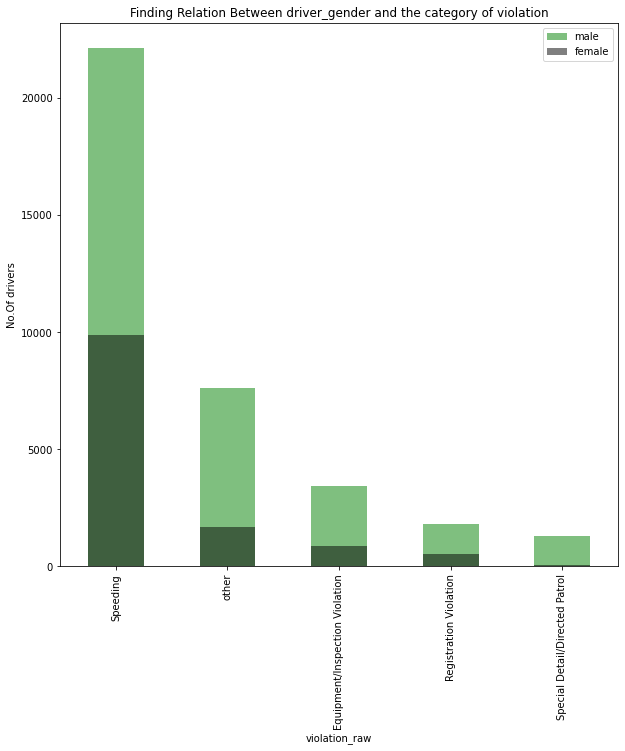

In [43]:
# Visualize the result 
plt.figure(figsize=(10,10))
df.violation_raw[male].value_counts().plot(kind='bar', alpha=.5, color='green', label='male')
df.violation_raw[female].value_counts().plot(kind='bar', alpha=.5, color='black', label='female')
plt.legend();
plt.title('Finding Relation Between driver_gender and the category of violation')
plt.ylabel('No.Of drivers')
plt.xlabel('violation_raw');

- Males are more than females.
- Both of them made speeding violation the most. 

# Explore the relation between stop_outcome and the category of violation:

In [44]:
df['stop_outcome'].value_counts()

Citation            45625
Arrest Driver        1642
Warning              1094
N/D                   348
No Action             262
Arrest Passenger      200
Name: stop_outcome, dtype: int64

In [45]:
## creat mask for stop_outcome:
Citation = df['stop_outcome'] == 'Citation'
Arrest_Driver = df['stop_outcome'] == 'Arrest Driver'
Warning = df['stop_outcome'] == 'Warning'

In [46]:
df.violation_raw[Citation].value_counts()

Speeding                          30971
other                              8033
Equipment/Inspection Violation     3273
Special Detail/Directed Patrol     1846
Registration Violation             1502
Name: violation_raw, dtype: int64

In [47]:
df.violation_raw[Arrest_Driver].value_counts()

other                             693
Speeding                          444
Equipment/Inspection Violation    279
Registration Violation            217
Special Detail/Directed Patrol      9
Name: violation_raw, dtype: int64

In [48]:
df.violation_raw[Warning].value_counts()

Speeding                          446
Equipment/Inspection Violation    337
other                             272
Registration Violation             34
Special Detail/Directed Patrol      5
Name: violation_raw, dtype: int64

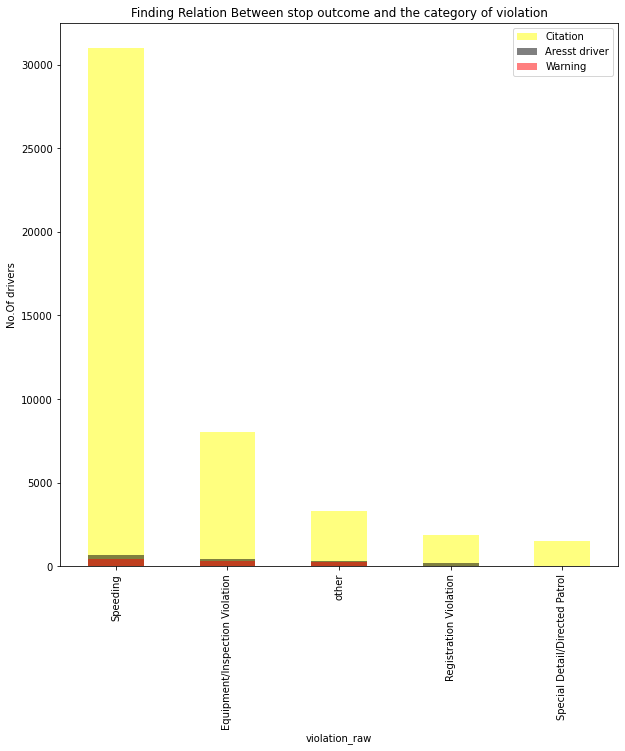

In [49]:
# Visualize the result 
plt.figure(figsize=(10,10))
df.violation_raw[Citation].value_counts().plot(kind='bar', alpha=.5, color='yellow', label='Citation')
df.violation_raw[Arrest_Driver].value_counts().plot(kind='bar', alpha=.5, color='black', label='Aresst driver')
df.violation_raw[Warning].value_counts().plot(kind='bar', alpha=.5, color='red', label='Warning')

plt.legend();
plt.title('Finding Relation Between stop outcome and the category of violation')
plt.ylabel('No.Of drivers')
plt.xlabel('violation_raw');

- Citation is the most stop outcome for traffic violations.
- speeding violation is very common.

# Explore the relation between driver_race and if he is arrested:

In [50]:
df['is_arrested'].value_counts()

False    47329
True      1842
Name: is_arrested, dtype: int64

In [51]:
## creat mask for arrested drivers:
arrested = df['is_arrested'] == True

In [52]:
df['driver_race'].value_counts()

White       37069
Black        6532
Hispanic     4056
Asian        1367
Other         147
Name: driver_race, dtype: int64

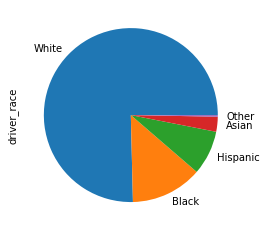

In [53]:
vis('driver_race')

In [54]:
df.driver_race[arrested].value_counts()

White       1095
Black        451
Hispanic     264
Asian         30
Other          2
Name: driver_race, dtype: int64

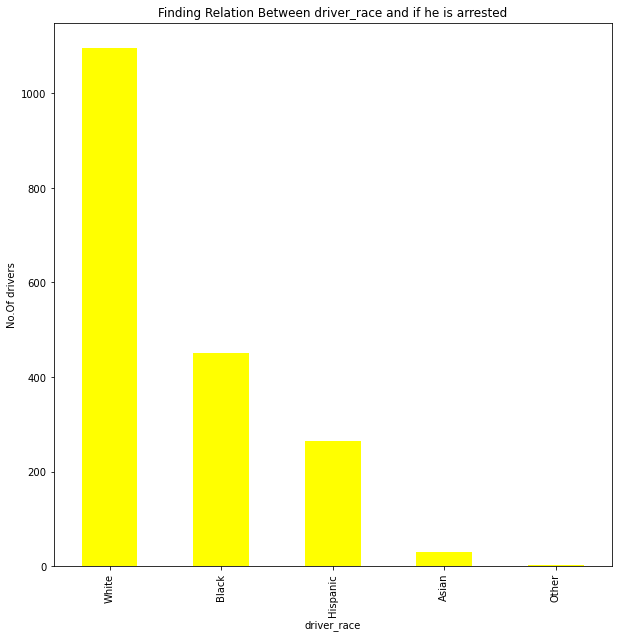

In [55]:
# Visualize the result 
plt.figure(figsize=(10,10))
df.driver_race[arrested].value_counts().plot(kind='bar', color='yellow')                                        
plt.title('Finding Relation Between driver_race and if he is arrested')
plt.ylabel('No.Of drivers')
plt.xlabel('driver_race');

- There is no racism from the police against any race of drivers.
- white drivers is the most drivers arrested then black, because whites is the most in data.


# Conclusions:
## From stating dependent and independent variables I found that:
- There is no relation between drugged drivers and category of violation., the number of arrested drivers because of drugs are very small.
- Drivers have 40 years old or less make more traffic violations.
- Speeding violations is the most common for all ages. 
- Males is more than females in this data, so males made more violations.
- Citations is the most stop outcome for traffic violations especially speeding.
- There is no relation between driver race and if he is arrested or not, there are many white drivers in data, so there are many arrested white drivers then black drivers.